In [408]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [409]:
# Use pd.read_excel instead of pd.read_csv for .xls files
df = pd.read_excel('kelulusan_train.xls')
df


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.5,0.99,TEPAT
375,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,2.97,TEPAT
376,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,3.03,TEPAT
377,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0,3.16,TEPAT


In [410]:
# Use pd.read_excel to read the second file, it will overwrite the previous df
df1 = pd.read_excel('kelulusan_test.xls')
df1


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.50,0.99,TEPAT
141,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,2.97,TEPAT
142,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,3.03,TEPAT
143,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.00,3.16,TEPAT


In [411]:
df.isnull().sum()


,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [412]:
# calculate mean of 'IPS 8'
mean_IPS_8 = df['IPS 8'].mean()  # Changed variable name to mean_IPS_8

# fill missing value in 'parson_emp_lenght' column with the mean value
df['IPS 8'].fillna(mean_IPS_8, inplace=True)  # Use the correct variable name

# Check for the correct column name, it might be 'ipk' instead of 'IPK'
# Print the columns of the DataFrame to see the available columns
print(df.columns)
# calculate mean of 'IPS 8'
mean_emp_length = df['IPS 8'].mean()

Index(['NAMA', 'JENIS KELAMIN', 'STATUS MAHASISWA', 'UMUR', 'STATUS NIKAH',
       'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8',
       'IPK ', 'STATUS KELULUSAN'],
      dtype='object')


<ipython-input-412-f321868cc23b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IPS 8'].fillna(mean_IPS_8, inplace=True)  # Use the correct variable name


In [413]:
df.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [414]:
actual_column_name = df.columns[df.columns.str.contains('IPK', case=False)].values[0]  # Find the column that contains "IPK", case-insensitive

# Calculate the mean of the column
mean_IPK = df[actual_column_name].mean()

# Fill missing values in the column with the mean
df[actual_column_name].fillna(mean_IPK, inplace=True)

<ipython-input-414-b120611b852a>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[actual_column_name].fillna(mean_IPK, inplace=True)


In [415]:
df.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [416]:
df1.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [417]:
# calculate mean of 'IPS 8'
mean_IPS_8 = df1['IPS 8'].mean()  # Changed variable name to mean_IPS_8

# fill missing value in 'parson_emp_lenght' column with the mean value
df1['IPS 8'].fillna(mean_IPS_8, inplace=True)  # Use the correct variable name

# Check for the correct column name, it might be 'ipk' instead of 'IPK'
# Print the columns of the DataFrame to see the available columns
print(df1.columns)
# calculate mean of 'IPS 8'
mean_emp_length = df1['IPS 8'].mean()

Index(['NAMA', 'JENIS KELAMIN', 'STATUS MAHASISWA', 'UMUR', 'STATUS NIKAH',
       'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8',
       'IPK ', 'STATUS KELULUSAN'],
      dtype='object')


<ipython-input-417-23ac80ac4291>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['IPS 8'].fillna(mean_IPS_8, inplace=True)  # Use the correct variable name


In [418]:
df1.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [419]:
actual_column_name = df1.columns[df1.columns.str.contains('IPK', case=False)].values[0]  # Find the column that contains "IPK", case-insensitive

# Calculate the mean of the column
mean_IPK = df1[actual_column_name].mean()

# Fill missing values in the column with the mean
df1[actual_column_name].fillna(mean_IPK, inplace=True)

<ipython-input-419-22589ef56707>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[actual_column_name].fillna(mean_IPK, inplace=True)


In [420]:
df1.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [421]:
# Data Preprocessing
X = df.drop('STATUS KELULUSAN', axis=1)
y = df['STATUS KELULUSAN']
# Data Preprocessing
X = df1.drop('STATUS KELULUSAN', axis=1)
y = df1['STATUS KELULUSAN']
# Apply get_dummies and fill NaN values before splitting
X = pd.get_dummies(X, columns=['NAMA', 'JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH'])
# Fill NaN values in X (if any)
X = X.fillna(X.mean())  # or X.fillna(X.median()) for a more robust approach
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardzation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [422]:
# Training model
knn = KNeighborsClassifier(n_neighbors=5) # jumlah tetangga (k) dapat disesuaikan
knn.fit(X_train, y_train) # This line is added to fit the model


KNeighborsClassifier()

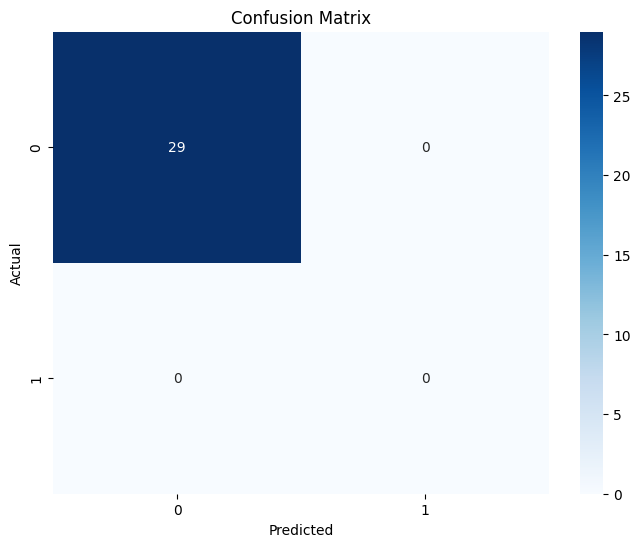

In [423]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import pandas as pd # Import pandas to create DataFrame
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for encoding

# Melakukan prediksi
y_pread = knn.predict(X_test)

# -----Changes start here-----
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your target variable (y_train) to learn the unique labels
label_encoder.fit(y_train)

# Transform y_test and y_pread using the fitted encoder
y_test_encoded = label_encoder.transform(y_test)
y_pread_encoded = label_encoder.transform(y_pread)

# Menghitung confusion matrix using the encoded labels
cm = confusion_matrix(y_test_encoded, y_pread_encoded, labels=[0, 1])
# -----Changes end here-----

# Visualisai confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


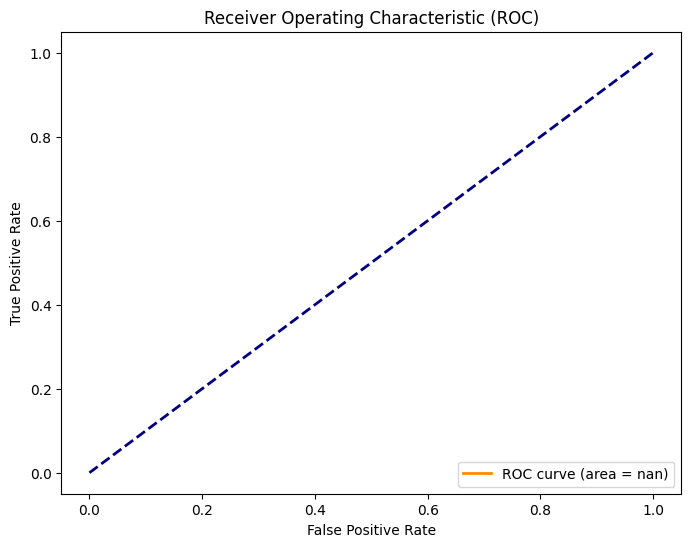

In [424]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import pandas as pd # Import pandas to create DataFrame
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Melakukan prediksi
y_pread = knn.predict(X_test)

# Encode the target variables (y_test and y_pread) into binary values
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pread_encoded = label_encoder.transform(y_pread)
# Menghitung nilai false positive rate (fpr) dan true possitve rate (tpr) untuk kurva ROC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pread_encoded) # Use encoded variables
roc_auc = auc(fpr, tpr)

# Visualisasi kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate') # Corrected the typo from 'xtabel' to 'xlabel'
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [425]:
# Evaluasi model
y_pread = knn.predict(X_test)

# confusion Matrix dan Classifation Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pread))
print("\nClassification Report:\n", classification_report(y_test, y_pread))

Confusion Matrix:
 [[29]]

Classification Report:
               precision    recall  f1-score   support

       TEPAT       1.00      1.00      1.00        29

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
